# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 17 de abril de 2022__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [10]:
RANDOM_STATE = 57

# Apartado 2: Recuperación de información

## 1) Carga del conjunto de datos

El fichero `BBC News.csv` contiene noticias clasificadas en 5 categorías diferentes. 

Carga los datos en un dataframe teniendo en cuenta que la columna `ArticleId` es un identificador de la noticia y por lo tanto no lo vamos a usar. 

Estudia el tamaño del conjunto de datos y la proporción de noticias que pertenecen a cada una de las categorías.

Crea una partición estratificada de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. 

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("BBC News.csv", index_col = 0)
df

,Text,Category
ArticleId,,
1833,worldcom ex-boss launches defence lawyers defe...,business
154,german business confidence slides german busin...,business
1101,bbc poll indicates economic gloom citizens in ...,business
1976,lifestyle governs mobile choice faster bett...,tech
917,enron bosses in $168m payout eighteen former e...,business
...,...,...
857,double eviction from big brother model caprice...,entertainment
325,dj double act revamp chart show dj duo jk and ...,entertainment
1590,weak dollar hits reuters revenues at media gro...,business


In [13]:
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

<AxesSubplot:ylabel='Category'>

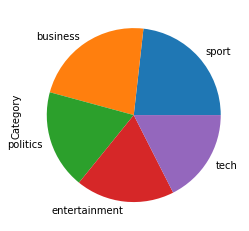

In [14]:
df['Category'].value_counts().plot.pie()

In [15]:
df_aux = df[23:24]
df_aux.values

array([['ferguson urges henry punishment sir alex ferguson has called on the football association to punish arsenal s thierry henry for an incident involving gabriel heinze.  ferguson believes henry deliberately caught heinze on the head with his knee during united s controversial win. the united boss said it was worse than ruud van nistelrooy s foul on ashley cole for which he got a three-game ban.  we shall present it to the fa and see what they do. the tackle on heinze was terrible   he said. clubs are permitted to ask the fa to examine specific incidents but information is expected to be provided within 48 hours of the game. the clash occurred moments before half-time when a freddie ljungberg challenge left heinze on the ground on the left touchline. henry  following the ball  attempted to hurdle the argentine but his knee collided with the back of heinze s head.  the striker protested his innocence - and referee mike riley deemed the collision accidental. ferguson was also upset b

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'].values, df['Category'], test_size=0.2, random_state=RANDOM_STATE)
train_len = len(X_train)
test_len = len(X_test)
(train_len, test_len)

(1192, 298)

In [18]:
X_train

array(['few ready  for information act thousands of public bodies are ill-prepared for the freedom of information act  due to come into force next month  because of government failures  say mps.  from next month anyone will have the power to demand information from a range of public bodies - from whitehall departments to doctors  surgeries. but an all-party committee said it was  not confident  many would be ready. it blamed the department for constitutional affairs for a  lack of consistent leadership .  the act comes into effect in england  wales and northern ireland  on 1 january while similar measures are being brought in at the same time in scotland. it provides the public with a right of access to information held by about 100 000 public bodies  subject to various exemptions.  but the government department responsible for implementing the change suffered from an  unusually high turnover  of staff within the department  which had  seriously interfered  with its work  said the cons

## 2) Representación basada en bolsa de palabras y tf-idf

La primera vectorización que vamos a usar representará los mensajes usando el modelo de bolsa de palabras, monogramas y el valor tf-idf de cada palabra. Usa como _stop words_ las que vienen configuradas por defecto para el inglés.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test. Muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y comenta las clases en las que se comporta mejor y peor. ¿Crees que los resultados son buenos?

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [20]:
vectorizer = CountVectorizer(stop_words='english', binary=False)
train_vector_data=vectorizer.fit_transform(X_train)

In [21]:
train_vector_data

<1192x22249 sparse matrix of type '<class 'numpy.int64'>'
	with 170451 stored elements in Compressed Sparse Row format>

In [22]:
feature_names = vectorizer.get_feature_names()
print(len(feature_names))
print(feature_names[:20])
print(feature_names[5000:5020])
print(feature_names[-20:])

22249
['00', '000', '0001', '000bn', '000m', '000th', '001', '001and', '001st', '0051', '01', '0100', '0130', '028', '03', '033', '04', '0400', '04bn', '04secs']
['consecutive', 'consecutively', 'conseil', 'consensus', 'consent', 'consenus', 'consequences', 'consequently', 'conservationists', 'conservative', 'conservatively', 'conservatives', 'conserve', 'consider', 'considerable', 'considerably', 'consideration', 'considerations', 'considered', 'considering']
['zillion', 'zimbabwe', 'zinc', 'zinedine', 'ziyi', 'zodiac', 'zoe', 'zoellick', 'zola', 'zombie', 'zombies', 'zone', 'zonealarm', 'zones', 'zoom', 'zooms', 'zooropa', 'zurich', 'zutons', 'zvonareva']


In [23]:
vectorizer = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,1), token_pattern=r'(?u)\b[A-Za-z]+\b')
train_vector_data = vectorizer.fit_transform(X_train)
feature_names = vectorizer.get_feature_names()
print(len(feature_names))
print(feature_names[:20])
print(feature_names[5000:5020])
print(feature_names[-20:])

21183
['aa', 'aaa', 'aaas', 'aac', 'aadc', 'aaliyah', 'aaltra', 'aamir', 'aaron', 'abacus', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abating', 'abba', 'abbas', 'abbasi', 'abbott', 'abbreviated']
['dems', 'den', 'dench', 'denial', 'denials', 'denied', 'denies', 'denis', 'denise', 'denmark', 'dennis', 'denominated', 'densely', 'dent', 'dental', 'dented', 'deny', 'denying', 'denzel', 'deodorant']
['zillion', 'zimbabwe', 'zinc', 'zinedine', 'ziyi', 'zodiac', 'zoe', 'zoellick', 'zola', 'zombie', 'zombies', 'zone', 'zonealarm', 'zones', 'zoom', 'zooms', 'zooropa', 'zurich', 'zutons', 'zvonareva']


In [24]:
# Calculamos el valor TF-IDF 
tfidfer = TfidfTransformer()
train_preprocessed = tfidfer.fit_transform(train_vector_data)

In [25]:
train_preprocessed

<1192x21183 sparse matrix of type '<class 'numpy.float64'>'
	with 165531 stored elements in Compressed Sparse Row format>

In [26]:
print(train_preprocessed[10])

  (0, 21069)	0.024203852446588913
  (0, 20918)	0.020424073199486976
  (0, 20820)	0.04265179864601438
  (0, 20819)	0.031146156935958614
  (0, 20791)	0.04186805969703239
  (0, 20621)	0.026480300455834986
  (0, 20453)	0.11687355388798483
  (0, 20403)	0.031000506556773406
  (0, 20207)	0.36292861192665665
  (0, 20199)	0.048565827163218715
  (0, 19537)	0.03335317626468051
  (0, 19515)	0.04265179864601438
  (0, 19514)	0.08831396227862004
  (0, 19496)	0.038957851295994946
  (0, 19337)	0.04604203005933217
  (0, 19158)	0.07025254296373801
  (0, 19017)	0.021163662848831304
  (0, 18820)	0.04265179864601438
  (0, 18698)	0.045040443285434106
  (0, 18646)	0.03396558863002939
  (0, 18584)	0.10479481395468934
  (0, 18459)	0.07360003489479891
  (0, 18395)	0.028770894563856505
  (0, 18274)	0.03441137280797973
  (0, 18225)	0.025245510686071882
  :	:
  (0, 2931)	0.03441137280797973
  (0, 2928)	0.039386582773993255
  (0, 2903)	0.036800017447399455
  (0, 2740)	0.04032540132518407
  (0, 2377)	0.08863879868571

In [27]:
feature_names[126:127]

['accomplish']

In [28]:
test_vector_data = vectorizer.transform(X_test)
test_preprocessed = tfidfer.transform(test_vector_data)

In [29]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Noticia', index, ':', data[index], '\n')
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Noticia', index, 'vectorizada:', terminos.compressed(),'\n')
    print('Nº Palabras: ', len(terminos.compressed()))

In [30]:
write_terms(feature_names, X_train, train_preprocessed, 10)

Noticia 10 : vera drake s bafta triumph hope at the bafta film awards on saturday night  there is the prospect that a home-grown movie could walk off with a clutch of trophies.  vera drake  mike leigh s tale about a 1950s backstreet abortionist  is nominated in 11 categories. these include best film  best director and best actress shortlist for imelda staunton who plays the eponymous character. the film has spent months being lauded with prizes  from the venice film festival to five awards from the london critics  circle on wednesday night.  the baftas has a tradition of honouring british cinema  and this year vera drake is the obvious candidate to be heaped with praise. empire magazine s reviews editor dan jolin said the film had  a very good chance  of doing well on saturday  predicting that it would collect five or six awards.  i don t think it s going to do a lord of the rings-style sweep  but imelda staunton is a shoo-in for best actress   he said.   a best director prize for mike

In [31]:
target_names = ['business', 'entertainment', 'politics', 'sport', 'tech']

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

def knn(query, X_train, k):
    '''Devuelve los índices de los k documentos de entrenamiento más similares a la consulta usando 
    la similitud del coseno.
    
    Parámetros:
    - query: documento consulta vectorizado
    - X_train: documentos de entrenamiento vectorizados
    - k: número de documentos a recuperar
    
    Devuelve:
    - índices de los k documentos más similares a la consulta.
    '''
    
    # Necesitamos un vector de dimensión (1, X). Si se pasa un vector de dimensión X, transformarlo
    if len(query.shape) == 1:
        query = query.reshape(1, -1)

    simil = cosine_similarity(query, X_train)
    simil_idx = np.argsort(simil.flatten())
    simil_idx = simil_idx[::-1]
    return simil_idx[:k]

In [33]:
knn(test_preprocessed[10], train_preprocessed, 5)

array([524,  52,  27, 879, 392], dtype=int64)

In [34]:
def precision_at_k(y_selected, y_real, k):
    '''Devuelve la precisión @k de los documentos seleccionados.
    
    Parametros:
    - y_selected: etiquetas de los documentos seleccionados (se usan los k primeros)
    - y_real: etiqueta de la categoría correcta
    - k: número de documentos que se tienen en cuenta
    
    Devuelve:
    - Precisión@k
    '''
    
    return np.sum(y_selected[:k] == y_real) / k * 100

def mean_precisions_per_class(X_train, y_train, X_test, y_test, k):
    '''Devuelve las precision@k media para cada una de las classes.
    
    Parámetros:
    - X_train: documentos de entrenamiento vectorizados.
    - y_train: etiquetas de los documentos de entrenamiento.
    - X_test: documentos vectorizados que se usan como consultas
    - y_test: etiquetas de los documentos que se usan como consultas
    - k: número de documentos considerados a recuperar por la consulta
    
    Devuelve:
    - Diccionario clase -> precisión en tanto por ciento.
    '''
    
    # diccionario categoría -> lista de precisiones
    y_precisions = {y: [] for y in np.unique(y_test)}
    
    
    # Calcular precision@k para cada consulta
    for x_query, y_query in zip(X_test, y_test):
        idx = knn(x_query, X_train, k)
        y_selected = np.take(y_train, idx)
        precision = precision_at_k(y_selected, y_query, k)
        y_precisions[y_query].append(precision)
        
        
    # Calcular medias
    for y in y_precisions:
        y_precisions[y] = np.mean(y_precisions[y])
    
    return y_precisions

In [35]:
p5 = mean_precisions_per_class(train_preprocessed, y_train, test_preprocessed[:200,], y_test[:200], 5)
p5

{'business': 89.16666666666667,
 'entertainment': 86.66666666666667,
 'politics': 87.6470588235294,
 'sport': 92.0754716981132,
 'tech': 89.65517241379311}

In [36]:
p10 = mean_precisions_per_class(train_preprocessed, y_train, test_preprocessed[:200,], y_test[:200], 10)
p10

{'business': 86.25,
 'entertainment': 86.94444444444444,
 'politics': 87.05882352941177,
 'sport': 93.01886792452831,
 'tech': 90.0}

<AxesSubplot:xlabel='target'>

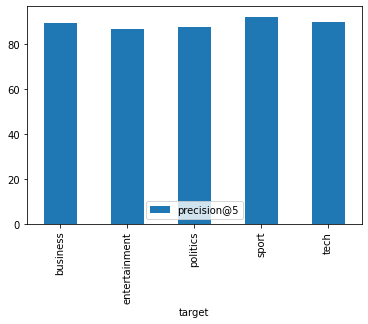

In [37]:
import pandas as pd

df_p5 = pd.DataFrame.from_dict(p5, orient='index', columns=['precision@5'])

df_p5["target"] = target_names

d = df_p5.set_index("target")

d.plot.bar()

## 3) Representación basada en word-embeddings y tf-idf

La segunda vectorización que vamos a usar representará los mensajes usando usando word-embeddings usando como pesos la frecuencia de aparición de cada palabra. Al igual que en el apartado anterior, usaremos monogramas y las _stop words_ que vienen configuradas por defecto para el inglés. Recuerda usar como vocabulario para vectorizar el vocabulario del fichero con las word-embeddings.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test.

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y compara los resultados con los del apartado anterior.

In [38]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
glove_file = "glove.6b.50d.txt"
model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

In [39]:
we_vocabulary = list(model.key_to_index.keys())
vectorizer2 = CountVectorizer(vocabulary = we_vocabulary, binary = False, stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b')

In [40]:
train_vector_data2 = vectorizer2.fit_transform(X_train) # X_train -> Corpus
feature_names2 = vectorizer2.get_feature_names()

In [41]:
# Calculamos el valor TF-IDF 
tfidfer2 = TfidfTransformer()
train_preprocessed2 = tfidfer.fit_transform(train_vector_data2)

test_vector_data2 = vectorizer2.transform(X_test)
test_preprocessed2 = tfidfer.transform(test_vector_data2)

In [42]:
feature_names2 = vectorizer2.get_feature_names()

In [43]:
write_terms(feature_names2, X_train, train_preprocessed2, 10)

Noticia 10 : vera drake s bafta triumph hope at the bafta film awards on saturday night  there is the prospect that a home-grown movie could walk off with a clutch of trophies.  vera drake  mike leigh s tale about a 1950s backstreet abortionist  is nominated in 11 categories. these include best film  best director and best actress shortlist for imelda staunton who plays the eponymous character. the film has spent months being lauded with prizes  from the venice film festival to five awards from the london critics  circle on wednesday night.  the baftas has a tradition of honouring british cinema  and this year vera drake is the obvious candidate to be heaped with praise. empire magazine s reviews editor dan jolin said the film had  a very good chance  of doing well on saturday  predicting that it would collect five or six awards.  i don t think it s going to do a lord of the rings-style sweep  but imelda staunton is a shoo-in for best actress   he said.   a best director prize for mike

In [44]:
p5 = mean_precisions_per_class(train_preprocessed2, y_train, test_preprocessed2[:200,], y_test[:200], 5)
p5

{'business': 89.16666666666667,
 'entertainment': 86.66666666666667,
 'politics': 87.6470588235294,
 'sport': 91.69811320754717,
 'tech': 91.03448275862068}

<AxesSubplot:xlabel='target'>

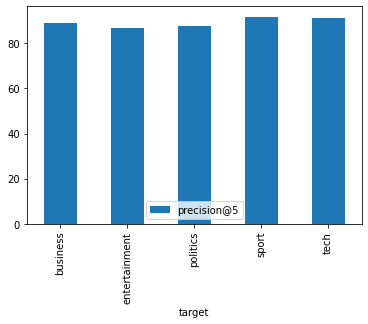

In [46]:
df_p5 = pd.DataFrame.from_dict(p5, orient='index', columns=['precision@5'])

df_p5["target"] = target_names

d2 = df_p5.set_index("target")

d2.plot.bar()

(<AxesSubplot:xlabel='target'>, <AxesSubplot:xlabel='target'>)

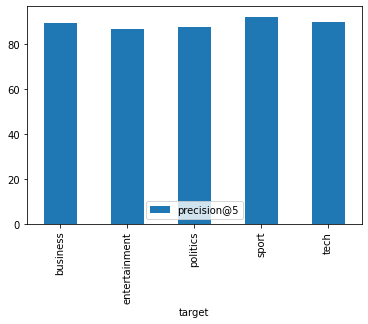

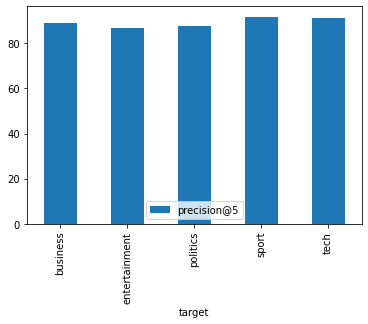

In [47]:
(d.plot.bar(), d2.plot.bar())

## 4) Análisis de errores


Vamos a investigar los resultados para entender mejor dónde están fallando los procesos de recuperación. Sigue los siguientes pasos.


1. Identifica la categoría de noticias donde la precisión media haya mejorado más al incorporar word-embeddings
2. Para dicha categoría, identifica la consulta donde la precisión haya mejorado más al usar word-embeddings
3. Muestra el texto original de la consulta y los términos que aparecen en las dos vectorizaciones tf-idf que usamos (recuerda que usamos diccionarios distintos para las vectorizaciones bolsa de palabras y word-embeddings).
4. Identifica las noticias recuperadas para dicha consulta para las dos aproximaciones y sus categorías (TF-IDF puro y con word-embeddings)
5. Muestra la intersección de términos entre la consulta y la primera noticia mal recuperada usando TF-IDF puro.
6. Muestra la intersección de términos entre la consulta y la última noticia bien recuperada usando word-embeddings.
7. A la luz de todo lo anterior, razona sobre por qué crees que el TF-IDF no fue capaz de clasificar bien la noticia y el word-embedding sí.


Puedes usar el código que calcula la intersección de términos que ponemos a continuación




In [76]:
def precisions_tech(X_train, y_train, X_test, y_test, k):
    
    # diccionario categoría -> lista de precisiones
    y_precisions = {y: [] for y in np.unique(y_test)}
    
    tech_precisions = []
    cont = 0
    
    # Calcular precision@k para cada consulta
    for x_query, y_query in zip(X_test, y_test):
        idx = knn(x_query, X_train, k)
        y_selected = np.take(y_train, idx)
        precision = precision_at_k(y_selected, y_query, k)
        y_precisions[y_query].append(precision)
        cont+=1
        if y_query == 'tech': 
            tech_precisions.append({precision, cont})
            
    return tech_precisions

In [69]:
list_sin_we = precisions_tech(train_preprocessed, y_train, test_preprocessed[:200,], y_test[:200], 5)

In [70]:
list_con_we = precisions_tech(train_preprocessed2, y_train, test_preprocessed2[:200,], y_test[:200], 5)

In [71]:
(np.array(list_sin_we), np.array(list_con_we))

(array([{3, 100.0}, {8, 100.0}, {10, 100.0}, {100.0, 21}, {80.0, 22},
        {34, 100.0}, {80.0, 36}, {100.0, 38}, {40, 100.0}, {100.0, 44},
        {100.0, 52}, {80.0, 56}, {80.0, 59}, {100.0, 63}, {60.0, 69},
        {100.0, 79}, {100.0, 86}, {88, 100.0}, {40.0, 101}, {100.0, 103},
        {107, 100.0}, {100.0, 110}, {130, 100.0}, {40.0, 132},
        {145, 100.0}, {80.0, 156}, {172, 60.0}, {100.0, 173}, {188, 100.0}],
       dtype=object),
 array([{3, 100.0}, {8, 100.0}, {10, 100.0}, {100.0, 21}, {80.0, 22},
        {34, 100.0}, {100.0, 36}, {100.0, 38}, {40, 100.0}, {100.0, 44},
        {100.0, 52}, {80.0, 56}, {80.0, 59}, {100.0, 63}, {60.0, 69},
        {100.0, 79}, {100.0, 86}, {88, 100.0}, {60.0, 101}, {100.0, 103},
        {107, 100.0}, {100.0, 110}, {130, 100.0}, {40.0, 132},
        {145, 100.0}, {80.0, 156}, {172, 60.0}, {100.0, 173}, {188, 100.0}],
       dtype=object))

In [74]:
X_test[35]

'moving mobile improves golf swing a mobile phone that recognises and responds to movements has been launched in japan.  the motion-sensitive phone - officially titled the v603sh - was developed by sharp and launched by vodafone s japanese division. devised mainly for mobile gaming  users can also access other phone functions using a pre-set pattern of arm movements. the phone will allow golf fans to improve their swing via a golfing game.  those who prefer shoot- em-ups will be able to use the phone like a gun to shoot the zombies in the mobile version of sega s house of the dead. the phone comes with a tiny motion-control sensor  a computer chip that responds to movement.  other features include a display screen that allows users to watch tv and can rotate 180 degrees. it also doubles up as an electronic musical instrument. users have to select a sound from a menu that includes clapping  tambourine and maracas and shake their phone to create a beat. it is being recommended for the ka

In [75]:
X_test[100]

'wi-fi web reaches farmers in peru a network of community computer centres  linked by wireless technology  is providing a helping hand for poor farmers in peru.  the pilot scheme in the huaral valley  80 kilometres north of the capital lima  aims to offer the 6 000-strong community up-to-date information on agricultural market prices and trends. the agricultural information project for farmers of the chancay-huaral valley also provides vital links between local organisations in charge of water irrigation  enabling them to coordinate their actions. more than 13 000 rural inhabitants  as well as 18 000 students in the region  will also benefit from the telecoms infrastructure.  the 14 telecentres uses only free open source software and affordable computer equipment. the network has been three years in the making and was officially inaugurated in september.  the non-government organisation  cepes (peruvian centre for social studies) led the $200 000 project  also backed by local instituti

In [97]:
def write_terms_aux (feature_names, feature_names2, data, vector_data1, vector_data2, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data1[index,:]>0
   
    
    # términos que aparecen en ese mensaje vectorizado
    terminos1 = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Noticia', index, ':', data[index], '\n')
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Noticia', index, 'vectorizada:', terminos1.compressed(),'\n')
    print('Nº Palabras: ', len(terminos1.compressed()))
    
    
    mask=vector_data2[index,:]>0
    terminos2 = ma.array(feature_names2, mask = ~(mask[0].toarray()))
    
    print('Noticia', index, 'vectorizada (we)', terminos2.compressed(), '\n')
    print('Nº Palabras (we): ', len(terminos2.compressed()))

In [98]:
write_terms_aux(feature_names, feature_names2, X_test, test_preprocessed, test_preprocessed2, 35)

Noticia 35 : moving mobile improves golf swing a mobile phone that recognises and responds to movements has been launched in japan.  the motion-sensitive phone - officially titled the v603sh - was developed by sharp and launched by vodafone s japanese division. devised mainly for mobile gaming  users can also access other phone functions using a pre-set pattern of arm movements. the phone will allow golf fans to improve their swing via a golfing game.  those who prefer shoot- em-ups will be able to use the phone like a gun to shoot the zombies in the mobile version of sega s house of the dead. the phone comes with a tiny motion-control sensor  a computer chip that responds to movement.  other features include a display screen that allows users to watch tv and can rotate 180 degrees. it also doubles up as an electronic musical instrument. users have to select a sound from a menu that includes clapping  tambourine and maracas and shake their phone to create a beat. it is being recommende

In [99]:
write_terms_aux(feature_names, feature_names2, X_test, test_preprocessed, test_preprocessed2, 100)

Noticia 100 : wi-fi web reaches farmers in peru a network of community computer centres  linked by wireless technology  is providing a helping hand for poor farmers in peru.  the pilot scheme in the huaral valley  80 kilometres north of the capital lima  aims to offer the 6 000-strong community up-to-date information on agricultural market prices and trends. the agricultural information project for farmers of the chancay-huaral valley also provides vital links between local organisations in charge of water irrigation  enabling them to coordinate their actions. more than 13 000 rural inhabitants  as well as 18 000 students in the region  will also benefit from the telecoms infrastructure.  the 14 telecentres uses only free open source software and affordable computer equipment. the network has been three years in the making and was officially inaugurated in september.  the non-government organisation  cepes (peruvian centre for social studies) led the $200 000 project  also backed by lo

In [104]:
train_preprocessed.shape

(1192, 21183)

In [105]:
knn(X_test[35], train_preprocessed, 1)

AttributeError: 'str' object has no attribute 'shape'

In [67]:
def terms_in_message(feature_names,vector_data,index):
    '''
    Devuelve un conjunto los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    mensaje=vector_data[index,:]>0
    terminos_presentes = ma.array(feature_names, mask = ~(mensaje[0].toarray()))

    return set(terminos_presentes.compressed())

In [68]:
terms_in_message(feature_names2, train_vector_data2, 10)

{'abortionist',
 'accomplished',
 'acting',
 'actor',
 'actress',
 'added',
 'adding',
 'aviator',
 'award',
 'awards',
 'away',
 'azkaban',
 'baby',
 'backstreet',
 'bafta',
 'baftas',
 'best',
 'big',
 'blue',
 'bradshaw',
 'british',
 'candidate',
 'cast',
 'categories',
 'category',
 'chance',
 'character',
 'cheering',
 'cinema',
 'circle',
 'clutch',
 'collect',
 'competitors',
 'contender',
 'contenders',
 'craney',
 'critic',
 'critics',
 'dan',
 'davis',
 'dead',
 'did',
 'director',
 'doing',
 'dollar',
 'don',
 'drake',
 'editor',
 'empire',
 'entitled',
 'eponymous',
 'extremely',
 'felt',
 'festival',
 'figure',
 'film',
 'films',
 'finding',
 'giving',
 'going',
 'good',
 'greater',
 'grown',
 'guardian',
 'guys',
 'harry',
 'heaped',
 'heather',
 'heavily',
 'high',
 'home',
 'honouring',
 'hope',
 'host',
 'imelda',
 'include',
 'jolin',
 'kate',
 'lauded',
 'lavish',
 'lavished',
 'leaving',
 'leigh',
 'likely',
 'london',
 'lord',
 'love',
 'magazine',
 'man',
 'maste